# Aula 2

In [2]:
import pandas as pd

dataframe = pd.read_csv("data/CC GENERAL.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0    40.900749           0.818182      95.40              0.00  \
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0                    95.4      0.000000             0.166667  \
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                    0.000000                          0.083333  \
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0                0.000000                 0              2        1000.0  \
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [3]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [4]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [5]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

# Aula 3
- Silhouette média

In [7]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3643118220365843


# Aula 4
- Davies Bouldin

In [8]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0765386864140325


# Aula 5
- Calinski Harabasz

In [9]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.620315169374


# Aula 6
- Avaliação Relativa

In [10]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [11]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [12]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3644845919974304 1.0757138590613295 3431.7937428414293


In [13]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.24423250895416312 1.2155337268398587 1605.9910770138647


In [22]:
# teste com aleatoridade
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03976029031412577 3.4518582579448704 304.3704454826026
0.3540748990045889 1.1379023215775725 1194.9456945384807


In [23]:
# estbilidade dos clusters
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3689633507303375 1.056111437621245 1204.0955477128857
0.35406999696241026 1.1389554530299946 1194.945411949724
0.36685269244474583 1.0988027839846315 1167.5299723518194


# Aula 7

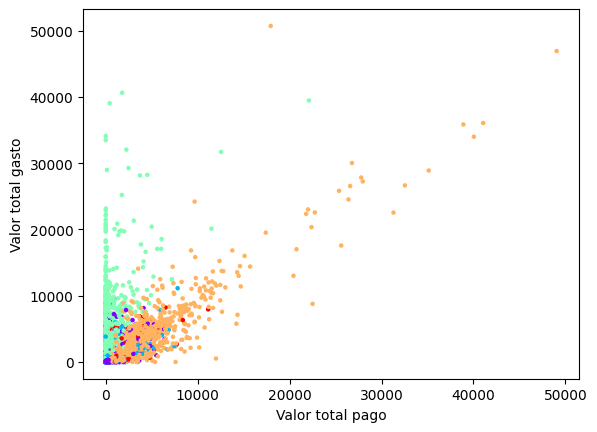

In [16]:
#as vezes é preciso executar duas vezes esse trecho para a imagem aparecer na tela
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

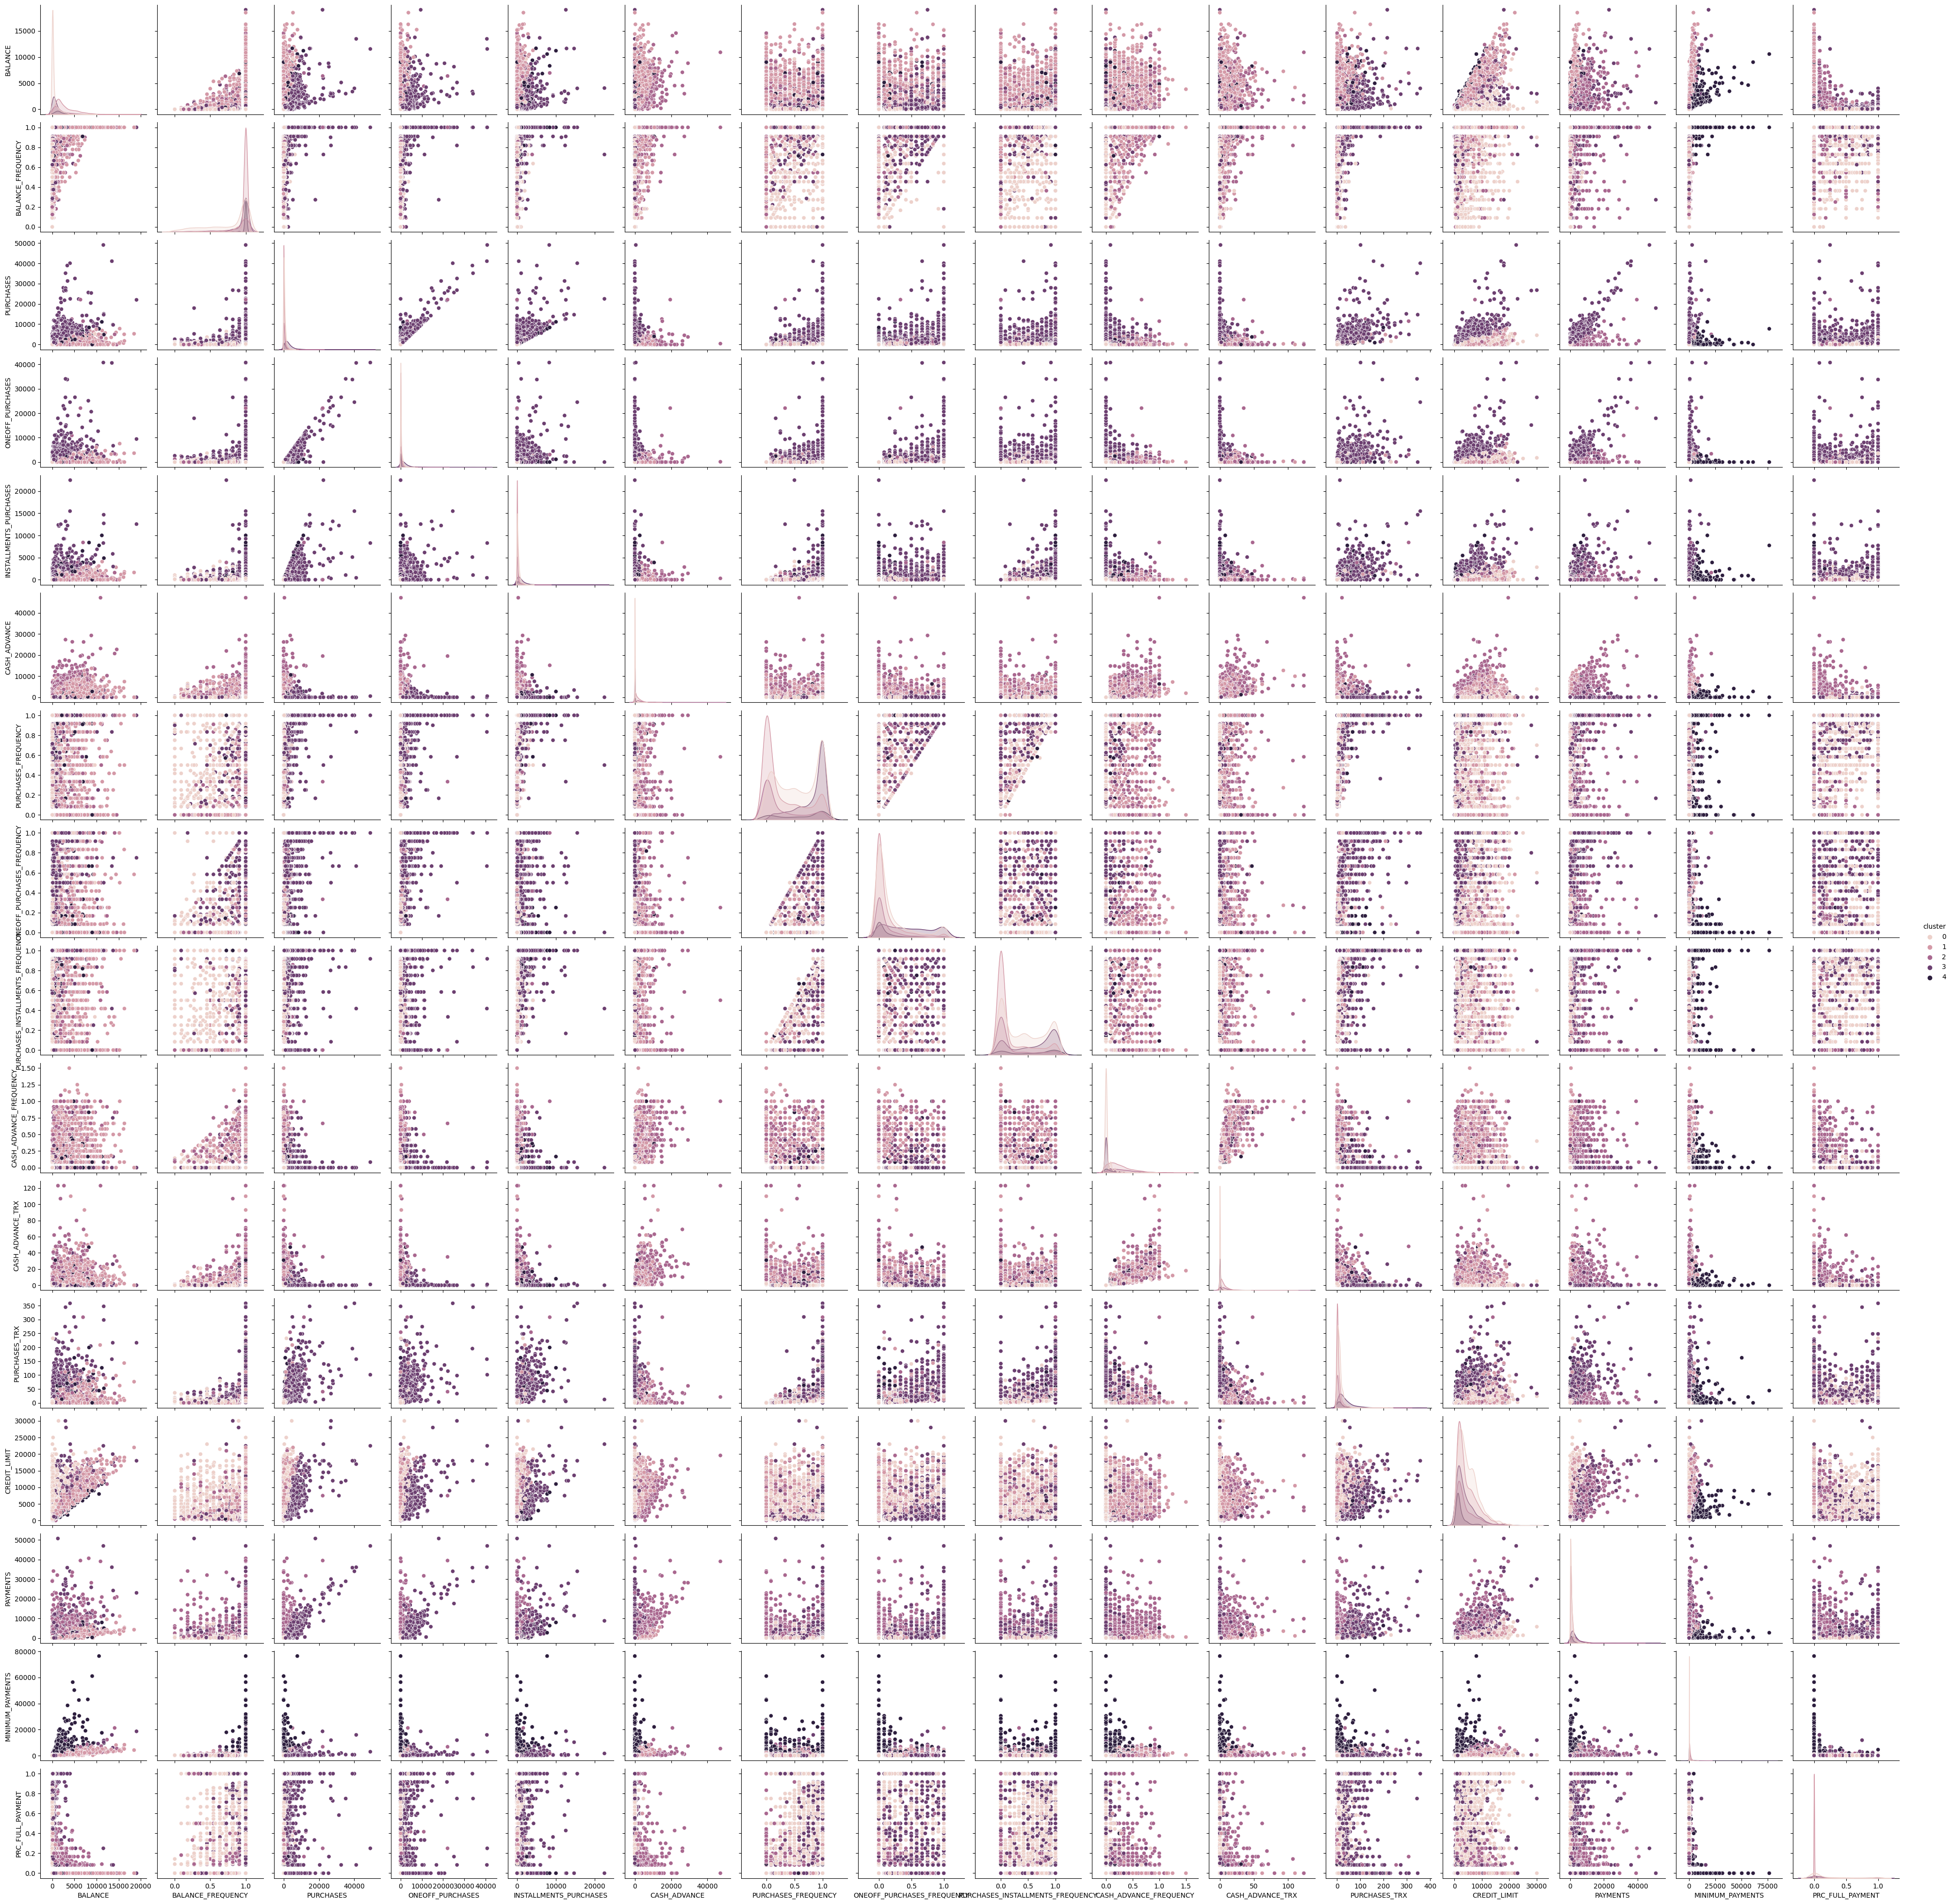

In [17]:
#é normal demorar bastante para executar o pairplot
#e se aparecer uma mensagem em vermelho do tipo "RuntimeWarning", pode ignorar e continue esperando que uma hora os gráficos vão aparecer :)
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

# Aula 8

In [18]:
dataframe.groupby("cluster").describe()

BALANCE                                                     
          count         mean          std        min          25%   
cluster                                                             
0        3283.0   444.410092   846.854678   0.000000    23.394451  \
1        2636.0  3045.592784  2480.821837   6.824905  1268.223800   
2        1080.0  1797.736178  1977.851450   0.000000   509.445700   
3        1542.0  1142.069153  1662.993780   0.000000   212.513230   
4         409.0  1985.924435  1860.809620  70.794108  1016.521850   

                                                BALANCE_FREQUENCY             
                 50%          75%           max             count      mean   
cluster                                                                       
0          83.004246   411.938506   9630.367575            3283.0  0.774263  \
1        2178.036176  4240.803321  18495.558550            2636.0  0.964811   
2        1099.666578  2320.763272  14581.459140            1080.0  0.862629   
3         555.745265  1370.230306  19043.138560            1542.0  0.927438   
4        1322.647480  2149.205166  11670.179850             409.0  0.989435   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT             
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.968369   4483.503862           3283.0  0.246580  \
1        ...      1330.820111   8345.641905           2636.0  0.001776   
2        ...       884.718306  21235.065300           1080.0  0.116068   
3        ...       524.765832  18621.013310           1542.0  0.277669   
4        ...      7164.306187  76406.207520            409.0  0.019617   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346670  0.0  0.0  0.000000  0.444444  1.0  
1        0.023263  0.0  0.0  0.000000  0.000000  0.6  
2        0.186430  0.0  0.0  0.083333  0.142857  1.0  
3        0.366637  0.0  0.0  0.083333  0.545455  1.0  
4        0.091163  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [19]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.91847034e-02 2.30720984e-04 1.21419268e-01 4.79461401e-02
  7.35732649e-02 2.46704026e-02 1.72711875e-04 3.36446400e-05
  1.40200079e-04 7.95673270e-06 1.25311933e-04 2.86143827e-03
  9.43503072e-01 1.53773419e-01 5.68716342e-02 7.60797515e-05]
 [5.05765392e-01 2.72548592e-04 6.22018990e-02 3.65041022e-02
  2.57196169e-02 2.50623227e-01 6.78649316e-05 2.59517111e-05
  4.53827454e-05 5.71787084e-05 1.14790866e-03 1.34151415e-03
  7.19190963e-01 1.66058961e-01 1.79856297e-01 5.35020961e-07]
 [2.36495627e-01 2.17079059e-04 5.90839764e-02 3.35900549e-02
  2.54990974e-02 4.04515281e-01 5.17432561e-05 2.02156765e-05
  3.44050611e-05 6.61036997e-05 1.58683563e-03 1.09881596e-03
  5.37705659e-01 5.92277512e-01 1.04514524e-01 2.74399110e-05]
 [1.59868414e-01 2.44971525e-04 4.38032000e-01 2.56766441e-01
  1.81436737e-01 2.58998252e-02 2.04273680e-04 8.89110040e-05
  1.50608019e-04 9.43348953e-06 1.72761240e-04 6.16998549e-03
  6.02990349e-01 4.03990210e-01 8.53452338e-02 7.18141776e-05]
 [3.

In [26]:
# função para calcular a varância
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0225
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0229
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0361
PAYMENTS 
0.0274
MINIMUM_PAYMENTS 
0.0546
PRC_FULL_PAYMENT 
0.0000


In [28]:
description = dataframe.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS   
cluster                                                                      
0         444.410092   628.830816    143.415857   5130.733100   814.018733  \
1        3045.592784   387.055948   1625.206163   4495.428680   967.478971   
2        1797.736178   466.450972   3286.529010   3985.945567  4667.179193   
3        1142.069153  3268.796796    183.841284   4094.429411  3046.699660   
4        1985.924435   855.013447    423.188665   2227.995110  1345.660153   

         n_clients  
cluster             
0             3283  
1             2636  
2             1080  
3             1542  
4              409  


# Aula 9

In [29]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        3283.0  0.246580  0.346670  0.0  0.0  0.000000  0.444444  1.0
1        2636.0  0.001776  0.023263  0.0  0.0  0.000000  0.000000  0.6
2        1080.0  0.116068  0.186430  0.0  0.0  0.083333  0.142857  1.0
3        1542.0  0.277669  0.366637  0.0  0.0  0.083333  0.545455  1.0
4         409.0  0.019617  0.091163  0.0  0.0  0.000000  0.000000  1.0

*A ordem dos clusters pode estar invertida aqui, porém não tem problema, cada linha vai representar um cluster diferente*.

**CLUSTER 0**: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

**CLUSTER 1**: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

**CLUSTER 2**: Clientes que gastam muito com compras. Melhores pagadores.

**CLUSTER 3**: Clientes que gastam muito com saques. Pagam as vezes.

**CLUSTER 4**: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.